In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
    
aequ_dir = "/mnt/c/Users/jan.zill/code/aequilibrae"
sys.path.append(aequ_dir)

from aequilibrae import logger  # noqa: E402
stdout_handler = logging.StreamHandler(sys.stdout)
logger.addHandler(stdout_handler)

import utils

In [4]:
code_dir = "/mnt/c/Users/jan.zill/code"
tntp_dir = os.path.join(code_dir, "TransportationNetworks_aequilibrae")
scenario = "Anaheim"
folder = os.path.join(tntp_dir, scenario)
link_file =  "Anaheim_net.tntp"
trip_file =  "Anaheim_trips.tntp"

block_centroids = False

In [5]:
%%time
bfw_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bfw", block_centroids=False, rgap=5*1e-5)

bfw Assignment STATS
Iteration, RelativeGap, stepsize
1,inf,1.0
2,0.11240350132103465,0.42753847828745584
3,0.008512480519396627,0.44666678878564764
4,0.0061369585759458965,0.25836845501323796
5,0.0019070139310053541,0.9928446411966052
6,0.006766060707087605,0.17987928546335463
7,0.0019479525587522814,0.2181580991067013
8,0.0012489774143101496,0.2835471512770671
9,0.001152507311825469,0.8830321859440116
10,0.0014305979833891312,0.2281896727384955
11,0.0006671239683778211,0.0889444861486803
12,0.00045741723614860263,0.07194176984635361
13,0.0002912472346597803,0.4284893787701875
14,0.0005181111919293951,0.9197722122199123
15,0.0004483451540412932,0.03905481115223361
16,0.00024048297488428818,0.030145393808026395
17,0.00016639298200186184,0.2633516420332057
18,0.00014314827852783072,0.13310661399306253
19,0.00012063297547367859,0.14521535353040643
20,7.494373328084756e-05,0.16436255703617084
21,0.00013863073458314718,0.312682667334213
22,0.0001594426224032574,0.9682323873476155
23,0.0001

In [6]:
%%time
path_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bush-based", block_centroids=False, rgap=5*1e-5)

bush-based Assignment STATS
 Initialised data structures, num nodes = 416, num links = 914
 0th iteration done, cost = 1264524.25
Iteration 1, computed gap: 0.0027518112044503384, computed objective: 1208761.5
Iteration 2, computed gap: 0.000910229489369474, computed objective: 1206046.25
Iteration 3, computed gap: 0.0002401923865921196, computed objective: 1205672.5
Iteration 4, computed gap: 5.239975839810285e-05, computed objective: 1205599.0
bush-based Assignment finished. 4 iterations and 5.239975839810285e-05 final gap
CPU times: user 7.02 s, sys: 5.17 s, total: 12.2 s
Wall time: 1.86 s


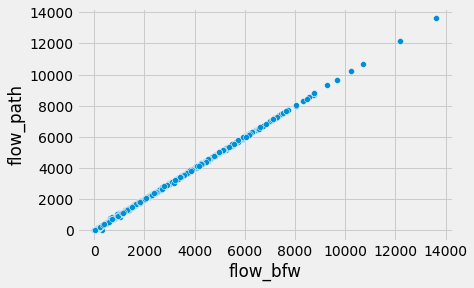

max diff in flow = 267.916
max rel diff in flow = 55.066%


,link_id_bfw,a_node,b_node,capacity_bfw,alpha_bfw,beta_bfw,direction_bfw,flow_bfw,link_id_path,capacity_path,alpha_path,beta_path,direction_path,flow_path,abs_change,rel_change
704,704,354,355,5400,0.15,4,1,304.546982,704,5400,0.15,4,1,36.630737,267.916245,0.879721
667,667,342,343,5400,0.15,4,1,650.530030,667,5400,0.15,4,1,826.721558,176.191528,0.270843
706,706,355,343,5400,0.15,4,1,1017.598121,706,5400,0.15,4,1,871.433228,146.164893,0.143637
758,758,370,371,5400,0.15,4,1,925.147365,758,5400,0.15,4,1,1046.902588,121.755223,0.131606
760,760,371,355,5400,0.15,4,1,713.051139,760,5400,0.15,4,1,834.802429,121.751291,0.170747
702,702,354,342,5400,0.15,4,1,988.982204,702,5400,0.15,4,1,1090.046143,101.063938,0.102190
756,756,370,354,5400,0.15,4,1,1121.615256,756,5400,0.15,4,1,1023.715881,97.899375,0.087284
845,845,394,393,5400,0.15,4,1,3163.161190,845,5400,0.15,4,1,3070.334229,92.826961,0.029346
841,841,393,392,5400,0.15,4,1,1409.428345,841,5400,0.15,4,1,1326.485840,82.942505,0.058848
838,838,392,391,5400,0.15,4,1,1409.428345,838,5400,0.15,4,1,1326.485840,82.942505,0.058848


In [7]:
full_result = bfw_res_.drop(columns=['time']).merge(path_res_.drop(columns=['time']), on=['a_node', 'b_node'], how='outer', suffixes=['_bfw', '_path'])
sns.scatterplot(data=full_result, x='flow_bfw', y='flow_path');
plt.show();
full_result['abs_change'] = np.abs(full_result.flow_bfw - full_result.flow_path)
full_result['rel_change'] = full_result['abs_change'] / full_result['flow_bfw']
print(f"max diff in flow = {full_result['abs_change'].max():.3f}")
print(f"max rel diff in flow = {full_result['rel_change'].abs().max():.3f}%")
display(full_result.sort_values(by=['abs_change'], ascending=False).head(10))